# Check label

In [71]:
import glob
import shutil

singularities_labeled_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_singularities_labeled/'
singularities_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_singularities/'
thin_labeled_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_thin_labeled/'

thin_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_thin/'
singularities_labeled_confirmed_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_singularities_labeled_confirmed/'

thin_paths = []
for img_path in glob.glob(thin_folder + "*.png"):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    label = tmp[-2]
    thin_paths.append(img_name)
    
#     from_img = sigularities_folder + img_name
#     des_folder = sigularities_labeled_folder + label + '/'
#     !mkdir -p {des_folder}
#     to_img =  des_folder + img_name
#     shutil.copy(from_img, to_img)   


singularities_paths = []
for img_path in glob.glob(singularities_folder + "*.png"):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    singularities_paths.append(img_name)
    
singularities_labeled_confirmed_paths = []
for img_path in glob.glob(singularities_labeled_confirmed_folder + "*/*.png"):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    singularities_labeled_confirmed_paths.append(img_name)
    
thin_labeled_paths = []
for img_path in glob.glob(thin_labeled_folder + "*/*.png"):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    thin_labeled_paths.append(img_name)
    
len(thin_paths), len(thin_labeled_paths)
    

(489, 330)

# Create thin

In [67]:
singularities_labeled_confirmed_paths = []
for img_path in glob.glob(singularities_labeled_confirmed_folder + "*/*.png"):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    label = tmp[-2]
    
    from_img = thin_folder + img_name
    to_img = thin_labeled_folder + label + '/' + img_name
    
    !mkdir -p {thin_labeled_folder + label}
    shutil.copy(from_img, to_img)
  
print(from_img)
print(to_img)

/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_thin/image_left (195).png
/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_thin_labeled/UL/image_left (195).png


# Update class None

In [52]:
des_folder = singularities_labeled_folder + 'NONE'
!mkdir -p {des_folder}

none_path = [path for path in singularities_paths if path not in singularities_labeled_confirmed_paths]
for img_path in none_path:
    img_path = singularities_folder + img_path  
    shutil.copy(img_path, des_folder)
    
print(img_path)
print(des_folder)

/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_singularities/image_right (23).png
/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/huy_singularities_labeled/NONE


# Check label confirmed 

In [75]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hung_confirmed_folder = '/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/data_hung_response/fingerprint_labeled/'
df = pd.DataFrame()
for cls in os.listdir(hung_confirmed_folder):
    label = []
    df_cls = pd.read_excel(hung_confirmed_folder + "{}/Comment.xlsx".format(cls))
    for i in df_cls.File:
        label.append(cls)
    df_cls["label"] = label
    df = pd.concat([df_cls,df])

In [76]:
df.Comment = df.Comment.replace('Không xác định được',"NONE")
df.Comment = df.Comment.replace('Ảnh bị mất dữ liệu, không xác định được chính xác',"NONE")
df.Comment = df.Comment.replace('Thừa tâm và delta + che khuất nên không xác định chính xác',"NONE")
df.Comment = df.Comment.replace('Ảnh bị che nhiều, không xác định được chính xác',"NONE")
df.Comment = df.Comment.replace('Số đường vân từ tâm đến delta có thể lớn hơn 5 >>> UL/RL',"NONE")
df.Comment = df.Comment.replace('Hình xoay ngang, có thể sai',"NONE")
df.Comment = df.Comment.replace('Sai',"NONE")
df.Comment = df.Comment.replace('Hình bị mất dữ liệu',"NONE")
df.Comment = df.Comment.replace('Không xác định được, giống tâm WE',"NONE")


df.Comment = df.Comment.replace('Label đúng, thừa tâm và delta',"OK")
df.Comment = df.Comment.replace('Label đúng, thừa tâm',"OK")
df.Comment = df.Comment.replace('Label đúng, thừa delta',"OK")
df.Comment = df.Comment.replace('AS, thừa tâm và delta',"ARCH")
df.Comment = df.Comment.replace('Tâm WE, ko phải ARCh',"WE")
df.Comment = df.Comment.replace('Tâm WE, ko phải ARCH',"WE")
df.Comment = df.Comment.replace('Đây là tâm WE, ko phải ARCH',"WE")
df.Comment = df.Comment.replace('1 phần UL< ko phải ARCH',"UL")
df

File Comment label
0     image_left (22).png    NONE    UL
1     image_left (92).png    NONE    UL
2    image_left (156).png    NONE    UL
3    image_left (181).png      OK    UL
4    image_left (195).png      OK    UL
..                    ...     ...   ...
3    image_left (196).png      UL    RL
4    image_left (221).png      OK    RL
5    image_right (12).png    NONE    RL
6   image_right (189).png      OK    RL
7   image_right (235).png    NONE    RL

[192 rows x 3 columns]

In [77]:
df['new_label'] = df["Comment"]
df

File Comment label new_label
0     image_left (22).png    NONE    UL      NONE
1     image_left (92).png    NONE    UL      NONE
2    image_left (156).png    NONE    UL      NONE
3    image_left (181).png      OK    UL        OK
4    image_left (195).png      OK    UL        OK
..                    ...     ...   ...       ...
3    image_left (196).png      UL    RL        UL
4    image_left (221).png      OK    RL        OK
5    image_right (12).png    NONE    RL      NONE
6   image_right (189).png      OK    RL        OK
7   image_right (235).png    NONE    RL      NONE

[192 rows x 4 columns]

In [78]:
for i in range(0,len(df)):
    if df.iloc[i,3]=="OK":
        df.iloc[i,3] = df.iloc[i,2]
        
df

File Comment label new_label
0     image_left (22).png    NONE    UL      NONE
1     image_left (92).png    NONE    UL      NONE
2    image_left (156).png    NONE    UL      NONE
3    image_left (181).png      OK    UL        UL
4    image_left (195).png      OK    UL        UL
..                    ...     ...   ...       ...
3    image_left (196).png      UL    RL        UL
4    image_left (221).png      OK    RL        RL
5    image_right (12).png    NONE    RL      NONE
6   image_right (189).png      OK    RL        RL
7   image_right (235).png    NONE    RL      NONE

[192 rows x 4 columns]

In [88]:
# for _, row in df.iterrows():
#     img_name = row['File']
#     new_label = row['new_label']
    
#     from_img = singularities_folder + img_name
#     !mkdir -p {singularities_labeled_confirmed_folder + new_label}
#     to_img = singularities_labeled_confirmed_folder + new_label + '/' + img_name
#     shutil.copy(from_img, to_img)


none_files = []
for img_path in glob.glob(thin_labeled_folder + 'NONE/*.png'):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    none_files.append(img_name)

none_files
hong = {
    'File': none_files,
    'Comment': '',
    'label': 'NONE',
    'new_label': 'NONE'
}

df2 = pd.DataFrame(hong)

df3 = pd.concat([df, df2])
df3.rename(columns={'File': 'img_name', 'Comment': 'comment'}, inplace=True)

df3.to_csv("/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/classes.csv")  
df3    
    

img_name comment label new_label
0     image_left (22).png    NONE    UL      NONE
1     image_left (92).png    NONE    UL      NONE
2    image_left (156).png    NONE    UL      NONE
3    image_left (181).png      OK    UL        UL
4    image_left (195).png      OK    UL        UL
..                    ...     ...   ...       ...
183  image_left (168).png          NONE      NONE
184  image_left (321).png          NONE      NONE
185  image_left (130).png          NONE      NONE
186   image_left (69).png          NONE      NONE
187  image_right (23).png          NONE      NONE

[380 rows x 4 columns]

# Create classes.csv

In [74]:
img_names = []
labels = []
sources = []
for img_path in glob.glob(thin_labeled_folder + '*/*'):
    tmp = img_path.split("/")
    img_name = tmp[-1]
    label = tmp[-2]
    source = tmp[-3]
    
    img_names.append(img_name)   
    labels.append(label)
    sources.append(source)
    

hong1 = {
    'img_name': img_names,
    'new_label': labels,
    'source': sources
}

df = pd.DataFrame(hong1)
df
# df.to_csv("/data_science/data_science/data/v1/fingerprint/fprint_19052022/fprint_huy/classes_confirmed.csv")  

img_name new_label            source
0     image_left (221).png        RL  huy_thin_labeled
1    image_right (189).png        RL  huy_thin_labeled
2    image_right (299).png        RL  huy_thin_labeled
3    image_right (169).png        WE  huy_thin_labeled
4    image_right (313).png        WE  huy_thin_labeled
..                     ...       ...               ...
325   image_left (193).png        UL  huy_thin_labeled
326  image_right (215).png        UL  huy_thin_labeled
327   image_left (107).png        UL  huy_thin_labeled
328   image_left (249).png        UL  huy_thin_labeled
329   image_left (195).png        UL  huy_thin_labeled

[330 rows x 3 columns]

In [70]:
df

img_name label            source
0     image_left (221).png    RL  huy_thin_labeled
1    image_right (189).png    RL  huy_thin_labeled
2    image_right (299).png    RL  huy_thin_labeled
3    image_right (169).png    WE  huy_thin_labeled
4    image_right (313).png    WE  huy_thin_labeled
..                     ...   ...               ...
325   image_left (193).png    UL  huy_thin_labeled
326  image_right (215).png    UL  huy_thin_labeled
327   image_left (107).png    UL  huy_thin_labeled
328   image_left (249).png    UL  huy_thin_labeled
329   image_left (195).png    UL  huy_thin_labeled

[330 rows x 3 columns]

# View image

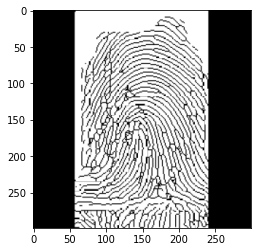

In [72]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(thin_folder + 'image_left (195).png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
